In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Create Relationships


## Graph Analysis and Visualization

In [7]:
relationships_df = pd.read_csv('C:\\Users\\Dhiraj\\Videos\\Fraud_Detection\\transactiondata.csv')

#sort the cases as a->b and b>
relationships_df.sort_values(by=['sourceA','destA'],inplace=True,ignore_index=True)
relationships_df
#grouping

relationships_df= relationships_df.groupby(['sourceA','destA'],sort=False,as_index=False).count()
relationships_df

sourceA  destA  amount
0      1232   3214       2
1      1234   1232       2
2      1234   2456       1
3      1234   3245       3
4      1234   3873       1
5      1236   1238       1
6      1236   2345       1
7      1238   6554       1
8      1443   1236       1
9      1443   2342       2
10     1443   3873       3
11     2133   2312       1
12     2133   2344       1
13     2133   3532       1
14     2312   4556       2
15     2321   2312       1
16     2341   2345       2
17     2342   2133       1
18     2342   2344       1
19     2344   2341       1
20     2345   2321       1
21     2345   6554       1
22     2456   1245       1
23     3214   1234       1
24     3214   2133       1
25     3214   2312       1
26     3214   2321       1
27     3245   2342       1
28     3245   3456       1
29     3245   4556       1
30     3456   2341       1
31     3873   1236       1
32     3873   2133       1
33     3873   5536       2
34     4556   2341       2
35     4567   2133       1
36     5536   2342       1
37     6554   2345       1

In [9]:
#Create graph from Pandas dataframe

G = nx.from_pandas_edgelist(relationships_df,
                            source = 'sourceA',
                            target = 'destA',
                           edge_attr= 'amount',
                           create_using=nx.Graph())

In [10]:
relationships_df.head()

sourceA  destA  amount
0     1232   3214       2
1     1234   1232       2
2     1234   2456       1
3     1234   3245       3
4     1234   3873       1

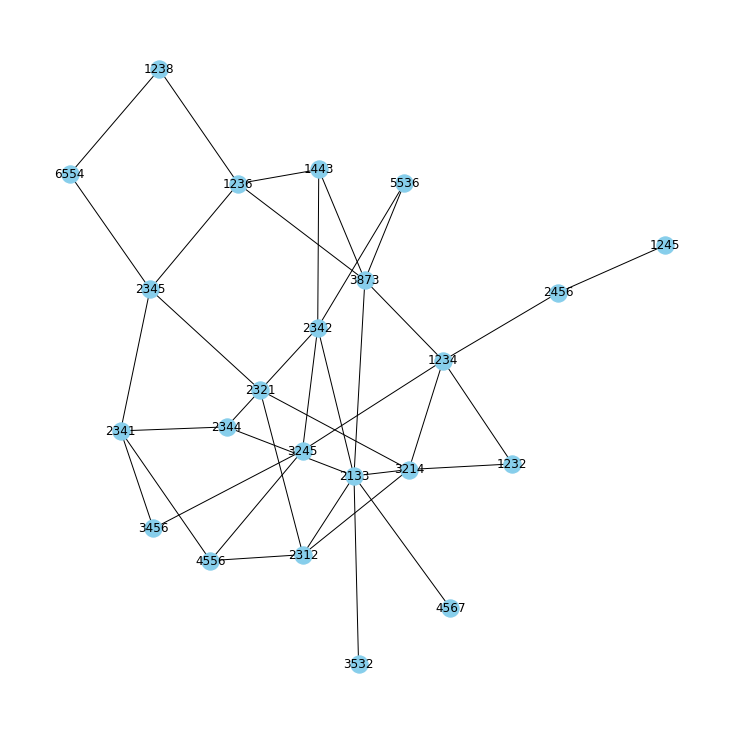

In [11]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True,node_color = 'skyblue', edge_cmap=plt.cm.Blues,pos=pos)
plt.show()

In [12]:
from pyvis.network import Network

net=Network(notebook=False, width='1000px', height='700px', bgcolor='#222222',font_color='white')

node_degree = dict(G.degree)

#Setting node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('witcher.html')

## Most important characters

In [13]:
# Degree Centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{1232: 0.09090909090909091,
 3214: 0.2272727272727273,
 1234: 0.2272727272727273,
 2456: 0.09090909090909091,
 3245: 0.18181818181818182,
 3873: 0.2272727272727273,
 1236: 0.18181818181818182,
 1238: 0.09090909090909091,
 2345: 0.18181818181818182,
 6554: 0.09090909090909091,
 1443: 0.13636363636363635,
 2342: 0.2272727272727273,
 2133: 0.3181818181818182,
 2312: 0.18181818181818182,
 2344: 0.13636363636363635,
 3532: 0.045454545454545456,
 4556: 0.13636363636363635,
 2321: 0.13636363636363635,
 2341: 0.18181818181818182,
 1245: 0.045454545454545456,
 3456: 0.09090909090909091,
 5536: 0.09090909090909091,
 4567: 0.045454545454545456}

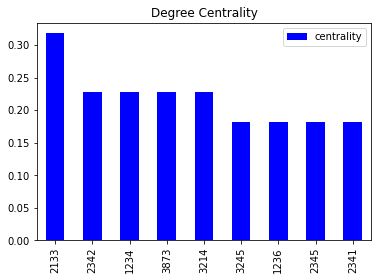

In [14]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='blue')
plt.title('Degree Centrality')
plt.show();

In [15]:
degree_df.head()

centrality
1232    0.090909
3214    0.227273
1234    0.227273
2456    0.090909
3245    0.181818

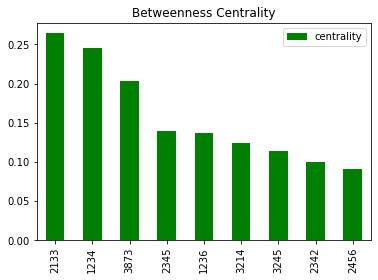

In [16]:
#Betweeness centrality 

betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='green')
plt.title('Betweenness Centrality')
plt.show();

In [17]:
betweenness_df.head()

centrality
1232    0.000000
3214    0.124603
1234    0.244877
2456    0.090909
3245    0.114286

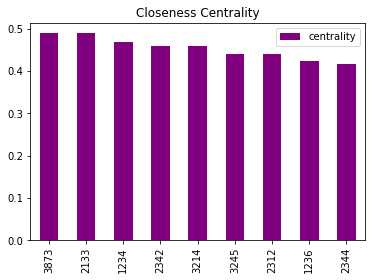

In [18]:
#Closeness Centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='purple')
plt.title('Closeness Centrality')
plt.show();

In [19]:
closeness_df.head()

centrality
1232    0.372881
3214    0.458333
1234    0.468085
2456    0.333333
3245    0.440000

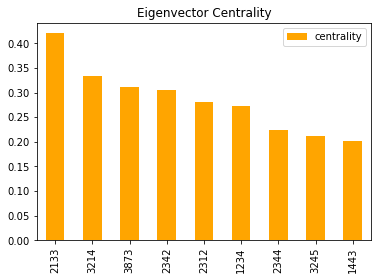

In [20]:
#Prestige/Eigenvector Centrality

prestige_dict= nx.eigenvector_centrality(G)
prestige_df = pd.DataFrame.from_dict(prestige_dict, orient='index',columns=['centrality'])


#Plot top 10 nodes

prestige_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color= 'orange')
plt.title('Eigenvector Centrality')
plt.show();

In [21]:
prestige_df.round(5).head()

centrality
1232     0.15288
3214     0.33269
1234     0.27295
2456     0.07359
3245     0.21109

In [22]:
#Save centrality measures


nx.set_node_attributes(G, degree_dict, 'degree centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness centrality')
nx.set_node_attributes(G, prestige_dict, 'pestrige centrality')

## Community Detection

In [ ]:
#! pip3 install python-louvain

In [28]:
import community as community_louvain

ModuleNotFoundError: No module named 'community'

In [24]:
communities = community_louvain.best_partition(G)
communities

NameError: name 'community_louvain' is not defined

In [ ]:
nx.set_node_attributes(G, communities, 'group')

In [26]:
com_net = Network(notebook=False, width='700px', height='600px', bgcolor='#222222',font_color='white')
com_net.from_nx(G)
com_net.show('witcher_communities.html')

## Evolution of Characters' Importance

In [27]:
#Initialize empty list of graphs of books

books_graph= []

all_books = [b for b in os.scandir('data') if '.txt' in b.name]

#sort dir entries by name

all_books.sort(key=lambda x: x.name)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

In [ ]:
from lib.utils.functions import *

In [ ]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    #Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    #Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    #Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    #Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])
    #Create relationship df
    relationship_df = create_relationship(sent_entity_df_filtered)
    
    #Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df,
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     

    books_graph.append(G)

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt","Ciri", "Yennefer"]].plot()
plt.title("Evolution of Characters' Importance")
plt.show();

In [ ]:
#!pip3 install seaborn

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(8,5))
a = sns.lineplot(data=degree_evol_df[["Geralt","Ciri", "Yennefer"]], palette = "Set2")
sns.set(style='dark',)
a.set(xlabel ="Book N°", ylabel = "Centrality Degree", title ="Evolution of Characters' Importance")
plt.show()